In [2]:
# Import necessary libraries for data analysis and visualization
# pandas: for data manipulation and analysis
# matplotlib: for creating visualizations
# numpy: for numerical operations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the height-weight dataset from a CSV file
df=pd.read_csv('height-weight.csv')

In [5]:
# Display the first 5 rows of the dataset to inspect its structure
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

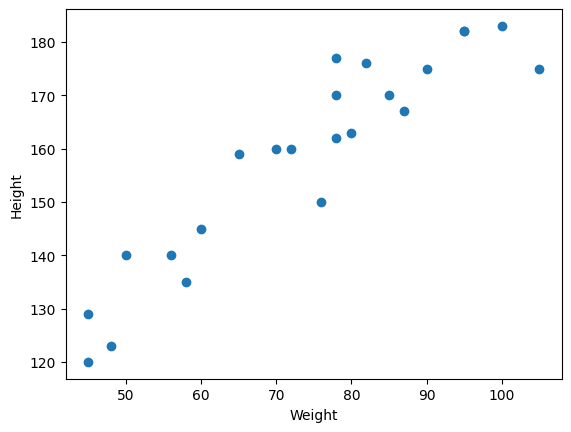

In [6]:
# Create a scatter plot to visualize the relationship between Weight and Height
# This helps us see if there's a linear relationship between these variables
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [7]:
# Calculate the correlation matrix between variables
# This shows how strongly variables are related to each other (values from -1 to 1)
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


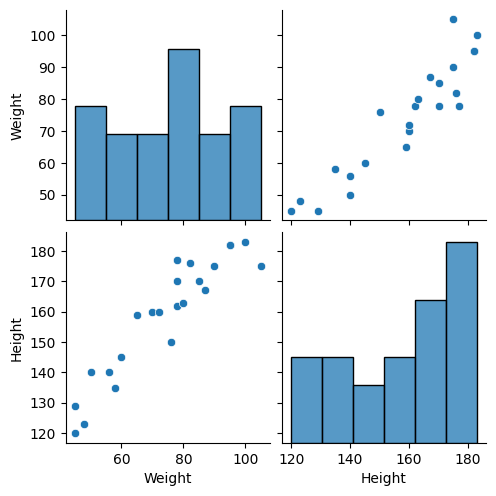

In [8]:
# Create a more advanced visualization using seaborn
# pairplot shows distributions and relationships between all variables in the dataset
import seaborn as sns
sns.pairplot(df)

In [9]:
# Define the independent (X) and dependent (y) variables for our regression model
# X needs to be a 2D array/dataframe (hence the double brackets)
# y can be a 1D array/series
X=df[['Weight']]  # Independent variable (predictor)
y=df['Height']    # Dependent variable (what we want to predict)

In [10]:
# Import the function needed to split our data into training and testing sets
# This is important for evaluating model performance on unseen data
from sklearn.model_selection import train_test_split

In [11]:
# Split the data into training (75%) and testing (25%) sets
# random_state=42 ensures reproducible results (same split every time)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [12]:
# Import StandardScaler to normalize/standardize our data
# This helps models perform better by scaling all features to similar ranges
from sklearn.preprocessing import StandardScaler

In [13]:
# Create a StandardScaler object and apply it to the training data
# fit_transform() learns the scaling parameters and applies them in one step
# This transforms the data to have mean=0 and variance=1
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [14]:
# Apply the same scaling to the test data
# Important: we use transform() not fit_transform() to apply the same scaling as training data
# This prevents data leakage from the test set
X_test=scaler.transform(X_test)

In [15]:
# Display the standardized test data
# Note that values are now centered around 0 with a standard deviation of 1
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [16]:
# Import the LinearRegression model from scikit-learn
# This is the main algorithm we'll use to build our predictive model
from sklearn.linear_model import LinearRegression

In [17]:
# Create a LinearRegression model instance
# n_jobs=-1 uses all available CPU cores for faster computation on large datasets
regression=LinearRegression(n_jobs=-1)

In [18]:
# Train (fit) the model using our training data
# This finds the optimal coefficients for the linear equation
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [19]:
# Display the model's learned parameters
# Coefficient (slope): the change in Height for a one-unit change in Weight
# Intercept: the predicted Height when Weight is zero (or average Weight when standardized)
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


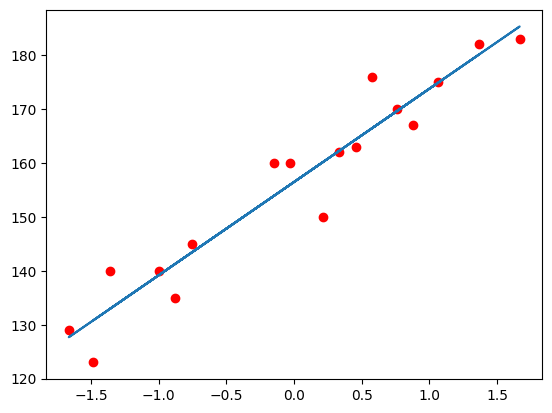

In [20]:
# Visualize the regression line along with the training data points
# The scatter points show actual data, while the line shows model predictions
# A good fit will have the line passing close to most points
plt.scatter(X_train,y_train,c='red')
plt.plot(X_train,regression.predict(X_train))

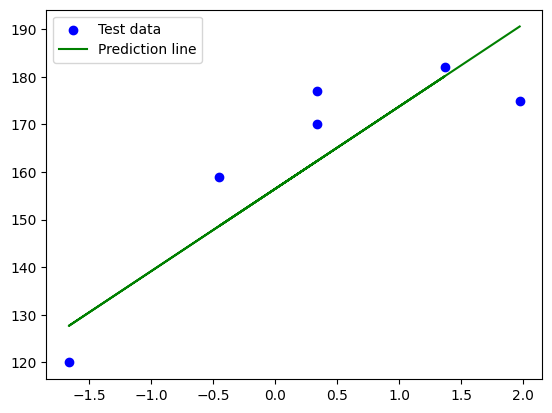

In [22]:
# on test data
# see generalization (performance on unseen data)
plt.scatter(X_test, y_test, c='blue', label='Test data')
plt.plot(X_test, regression.predict(X_test), color='green', label='Prediction line')
plt.legend()
plt.show()


<h3>prediction of test data</h3>

<p>predicted height output= intercept +coef_(Weights)</p>
<p>y_pred_test =156.470 + 17.29(X_test)</p>

In [23]:
# Make predictions on the test data
# This applies our trained model to new, unseen data points
y_pred=regression.predict(X_test)

In [24]:
# Import metrics to evaluate our model's performance
# These help us quantify how well our predictions match the actual values
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
# Calculate different error metrics to evaluate model performance:
# MSE (Mean Squared Error): Average of squared differences (sensitive to outliers)
# MAE (Mean Absolute Error): Average of absolute differences (more robust)
# RMSE (Root Mean Squared Error): Square root of MSE (in same units as target)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.66512588679501
10.716374991212605


<h3>R square</h3>

<p>Formula</p>

<p>R^2 = 1 - SSR/SST</p>

<p>R^2 = coefficient of determination SSR = sum of squares of residuals SST = total sum of squares</p>

In [26]:
# Import R² (R-squared) score metric
# R² measures the proportion of variance in the dependent variable explained by the model
from sklearn.metrics import r2_score

In [27]:
# Calculate and display the R² score
# R² ranges from 0 to 1, where:
# - 1 indicates perfect prediction
# - 0 indicates the model doesn't explain any variance (no better than the mean)
score=r2_score(y_test,y_pred)
print(score)

0.7360826717981276


<h2>Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]</h2>
<p>where:</p>
<p>R2: The R2 of the model n: The number of observations k: The number of predictor variables</p>

In [28]:
# Calculate the adjusted R-squared
# This penalizes adding unnecessary predictors to the model
# Adjusted R² is more reliable than R² when comparing models with different numbers of predictors
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [30]:
# Use our trained model to predict the height for a new weight value (72)
# First transform the new data point using the same scaler used on training data
# This demonstrates how to use the model for real predictions on new data
regression.predict(scaler.transform([[70]]))

C:\Users\Jay Sunil Sonawane\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([153.88159699])